In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
crop = pd.read_csv("Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,label
0,90,42,43,20.879744,82.002744,6.502985,rice
1,85,58,41,21.770462,80.319644,7.038096,rice
2,60,55,44,23.004459,82.320763,7.840207,rice
3,74,35,40,26.491096,80.158363,6.980401,rice
4,78,42,42,20.130175,81.604873,7.628473,rice


In [35]:
crop.shape

(8800, 7)

In [36]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            8800 non-null   int64  
 1   P            8800 non-null   int64  
 2   K            8800 non-null   int64  
 3   temperature  8800 non-null   float64
 4   humidity     8800 non-null   float64
 5   ph           8800 non-null   float64
 6   label        8800 non-null   object 
dtypes: float64(3), int64(3), object(1)
memory usage: 481.4+ KB


In [37]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
label          0
dtype: int64

In [38]:
crop.duplicated().sum()

0

In [39]:
crop.describe()

,N,P,K,temperature,humidity,ph
count,8800.00000,8800.000000,8800.000000,8800.000000,8800.000000,8800.000000
mean,50.89875,50.395341,40.482386,26.917001,69.200050,6.550638
std,36.83085,27.905026,38.562960,5.359877,22.297971,0.854590
min,0.00000,5.000000,5.000000,8.825675,12.187912,3.504752
25%,21.00000,29.000000,20.000000,23.938059,56.284228,6.028021
50%,37.00000,50.000000,29.000000,27.083399,77.514078,6.496048
75%,85.00000,65.000000,47.000000,29.914864,87.036656,7.009853
max,141.00000,149.000000,207.000000,47.396601,100.681749,10.024705


In [40]:
corr = crop.corr()
corr

,N,P,K,temperature,humidity,ph
N,1.000000,-0.159009,-0.014903,-0.006241,0.254461,0.041517
P,-0.159009,1.000000,0.603397,-0.075321,-0.267209,-0.065140
K,-0.014903,0.603397,1.000000,-0.106757,0.093337,-0.099606
temperature,-0.006241,-0.075321,-0.106757,1.000000,0.214188,-0.020305
humidity,0.254461,-0.267209,0.093337,0.214188,1.000000,0.002325
ph,0.041517,-0.065140,-0.099606,-0.020305,0.002325,1.000000


<AxesSubplot:>

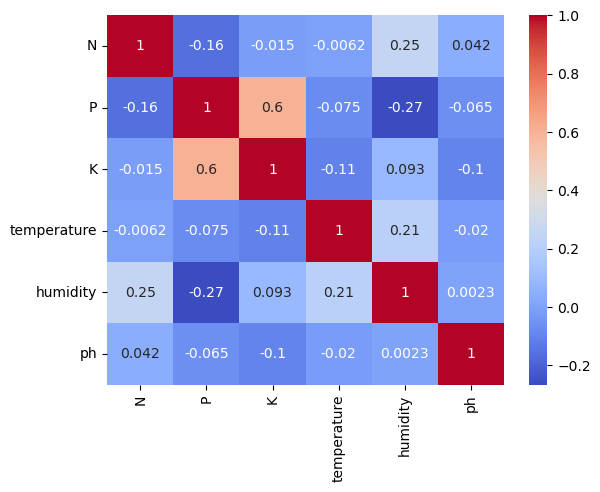

In [41]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True, cmap='coolwarm')

In [42]:
# sns.pairplot(crop, hue='label')


In [43]:
crop['label'].value_counts()

rice           400
maize          400
coffee         400
jute           400
cotton         400
coconut        400
papaya         400
orange         400
muskmelon      400
watermelon     400
grapes         400
mango          400
banana         400
pomegranate    400
lentil         400
blackgram      400
mungbean       400
mothbeans      400
pigeonpeas     400
kidneybeans    400
chickpea       400
groundnuts     400
Name: label, dtype: int64

In [44]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'groundnuts': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=crop['label'].map(crop_dict)

In [45]:
crop['crop_num'].value_counts()

1     400
2     400
22    400
3     400
4     400
5     400
6     400
7     400
9     400
10    400
11    400
12    400
13    400
14    400
15    400
16    400
17    400
18    400
19    400
20    400
21    400
8     400
Name: crop_num, dtype: int64

In [46]:

crop.head()

,N,P,K,temperature,humidity,ph,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,rice,1
1,85,58,41,21.770462,80.319644,7.038096,rice,1
2,60,55,44,23.004459,82.320763,7.840207,rice,1
3,74,35,40,26.491096,80.158363,6.980401,rice,1
4,78,42,42,20.130175,81.604873,7.628473,rice,1


In [47]:
X = crop.drop(['crop_num','label'],axis=1)
y = crop['crop_num']

In [48]:
X

,N,P,K,temperature,humidity,ph
0,90,42,43,20.879744,82.002744,6.502985
1,85,58,41,21.770462,80.319644,7.038096
2,60,55,44,23.004459,82.320763,7.840207
3,74,35,40,26.491096,80.158363,6.980401
4,78,42,42,20.130175,81.604873,7.628473
...,...,...,...,...,...,...
8795,6,46,23,29.337434,49.346253,8.958645
8796,24,44,24,27.965837,61.778444,8.682784
8797,35,47,15,24.868040,48.613247,8.664622
8798,4,49,18,25.876823,46.285163,5.867701


In [49]:
y.shape

(8800,)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
X_train.shape

(7040, 6)

In [53]:
X_test.shape

(1760, 6)

In [54]:
X_train

,N,P,K,temperature,humidity,ph
2067,89,28,33,26.444141,53.838762,6.993236
4982,41,74,18,31.052368,59.377808,6.632143
8648,26,35,19,26.729251,47.365348,5.414493
1643,59,62,52,43.675493,93.108872,6.608668
106,93,41,17,25.621717,66.504155,6.047907
...,...,...,...,...,...,...
5734,16,7,8,24.610767,89.226050,6.452560
5191,30,20,38,24.402294,91.803460,7.093514
5390,7,31,27,33.828662,45.823085,6.556735
860,32,78,22,23.970814,62.355576,7.007038


In [55]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [56]:
X_train

array([[0.63120567, 0.15972222, 0.13861386, 0.45678099, 0.47066385,
        0.53504737],
       [0.29078014, 0.47916667, 0.06435644, 0.5762551 , 0.5332563 ,
        0.47966462],
       [0.18439716, 0.20833333, 0.06930693, 0.46417282, 0.39751284,
        0.29290709],
       ...,
       [0.04964539, 0.18055556, 0.10891089, 0.64823403, 0.38008491,
        0.46809887],
       [0.22695035, 0.50694444, 0.08415842, 0.39265687, 0.56690573,
        0.53716418],
       [0.24113475, 0.02777778, 0.15346535, 0.41300983, 0.82879096,
        0.43372959]])

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [58]:
X_train

array([[ 1.0289534 , -0.7968726 , -0.20030903, -0.08037759, -0.69676529,
         0.51901669],
       [-0.27311833,  0.84109947, -0.58514026,  0.77413447, -0.44857862,
         0.09576534],
       [-0.68001575, -0.54761598, -0.55948485, -0.02750916, -0.98681793,
        -1.33149069],
       ...,
       [-1.19541914, -0.69004834, -0.35424152,  1.2889479 , -1.05592177,
         0.00737652],
       [-0.51725678,  0.98353182, -0.4825186 , -0.53901122, -0.31515452,
         0.53519399],
       [-0.46300379, -1.47342628, -0.12334278, -0.39344115,  0.72325225,
        -0.25528366]])

In [59]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(solver="lbfgs",max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, md in models.items():
    md.fit(X_train,y_train)
    ypred = md.predict(X_test)
    
    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

Logistic Regression  with accuracy : 0.8931818181818182
Naive Bayes  with accuracy : 0.9232954545454546
Support Vector Machine  with accuracy : 0.9193181818181818
K-Nearest Neighbors  with accuracy : 0.9079545454545455
Decision Tree  with accuracy : 0.9306818181818182
Random Forest  with accuracy : 0.9420454545454545
Bagging  with accuracy : 0.9261363636363636
AdaBoost  with accuracy : 0.12272727272727273
Gradient Boosting  with accuracy : 0.9329545454545455
Extra Trees  with accuracy : 0.8931818181818182


In [61]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
accuracy_score(y_test,ypred)

0.9454545454545454

In [62]:
def recommendation(N,P,k,temperature,humidity,ph):
    features = np.array([[N,P,k,temperature,humidity,ph]])
    transformed_features = ms.fit_transform(features)
    transformed_features = sc.fit_transform(transformed_features)
    prediction = rfc.predict(transformed_features).reshape(1,-1)
    
    return prediction[0] 

In [63]:
N = 100
P = 27
k = 100
temperature = 34.5
humidity = 69.38
ph = 4.4
predict = recommendation(N,P,k,temperature,humidity,ph)

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",8:"groundnuts", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpeas", 22: "Coffee"}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Jute is a best crop to be cultivated 


In [64]:
import pickle
pickle.dump(rfc,open('model1.pkl','wb'))
pickle.dump(ms,open('minmaxscaler1.pkl','wb'))
pickle.dump(sc,open('standscaler1.pkl','wb'))